# Simuler un processus aléatoire illustrant la détermination de la valeur d’une grandeur avec incertitudes types composées

Pour chacune des grandeurs, une moyenne et un écart-type sont connus. Il s'agit juste de faire un tirage aléatoire pour chacune des grandeurs puis calculer la grandeur composée. Sur un grand nombre de tirages, on peut alors calculer la moyenne et $\sigma_{n-1}$ pour la grandeur composée.

In [2]:
import random as rd
import matplotlib.pyplot as plt

In [7]:
def moy(liste):
    return sum(liste)/len(liste)

def ecart_type(liste):
    somme = 0
    for element in liste:
        somme += element**2
    return (1/(len(liste)-1) * somme - (sum(liste)/len(liste))**2)**0.5

def alea(moyenne, sigma):
    return rd.normalvariate(moyenne,sigma)

Cas d'un circuit RC série avec $R = 1000\ \Omega$ et une tolérance de 5% sur R et $C = 1\ \mu F$ et une tolérance de 5% sur C. On cherche a déterminer moyenne et écart-type sur les valeurs du temps caractéristique $\tau = R \times C$. Pour cela on tire un grand nombre de fois une valeur de R, une valeur de C puis on calcule $\tau$. Les résultats sont stockés dans des listes afin de pouvoir calculer moyenne et écart-type sur $\tau$.

In [20]:
# Données
R = 1000
sigmaR = 50
C = 1e-6
sigmaC = 5e-8

# Tirages et calculs
listeR = []
listeC = []
listeTau = []
for i in range(100000): # 100000 tirages aléatoires
    listeR.append(alea(R,sigmaR))
    listeC.append(alea(C,sigmaC))
    listeTau.append(listeR[-1]*listeC[-1])

Affichage des valeurs de $\tau$ sous la forme d'un histogramme. On retrouve bien l'allure d'une loi normale.

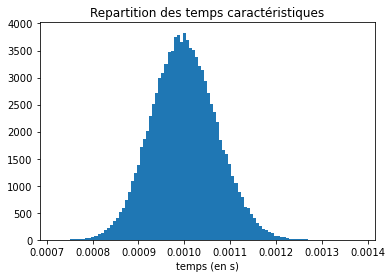

In [21]:
plt.hist(listeTau,bins=100)
plt.title("Repartition des temps caractéristiques")
plt.xlabel("temps (en s)")
plt.show()

On peut aussi comparer les valeurs moyennes de R et C aux valeurs données ainsi que les écart_types sur les deux séries aux tolérances données afin de vérifier la bonne réalisation du tirage aléatoire.

In [22]:
# Affichage des résultats
print("R donné:",R)
print("Rmoy de la série aléatoire:",moy(listeR))
print("---------------------------------------")
print("tolérance sur R:",sigmaR)
print("Ecart type de la série aléatoire de R:",ecart_type(listeR))
print("---------------------------------------")
print("C donné",C)
print("Cmoy de la série aléatoire:",moy(listeC))
print("---------------------------------------")
print("tolérance sur C:",sigmaC)
print("Ecart type de la série aléatoire de C:",ecart_type(listeC))

R donné: 1000
Rmoy de la série aléatoire: 999.9434283893464
---------------------------------------
tolérance sur R: 50
Ecart type de la série aléatoire de R: 50.18961909005149
---------------------------------------
C donné 1e-06
Cmoy de la série aléatoire: 1.0000291556909474e-06
---------------------------------------
tolérance sur C: 5e-08
Ecart type de la série aléatoire de C: 5.017780043708501e-08


On peut ensuite comparer la moyenne des valeurs de $\tau$ obtenues et la valeur obtenue par le calcul $\tau = R\times C$. On s'aperçoit que les deux valeurs sont très proches.

In [23]:
print("Tau calculé avec les R et C donnés:",R*C)
print("Tau moyenne de la série aléatoire:",moy(listeTau))

Tau calculé avec les R et C donnés: 0.001
Tau moyenne de la série aléatoire: 0.000999966253864291


Enfin, on peut vérifier que les lois statistiques données fonctionnent dans ce cas. Ainsi, l'incertitude type composée calculée par $$U(\tau) = \sqrt{\left( R\times U(C)\right)^2 + \left(U(R)\times C\right)^2} = \tau \times \sqrt{\left(\frac{U(R)}{R}\right)^2 + \left(\frac{U(C)}{C}\right)^2} $$
est comparée à l'écart type de la série de valeurs de $\tau$


Le calcul donne $U(\tau) = \tau \times \sqrt{0.05^2 + 0.05^2} = \tau \times 0.05 \times \sqrt{2} \approx 0.0707 \times \tau\ $ très proche de l'écart type de la saérie aléatoire.



In [26]:
print("Incertitude type composée calculé d'après les formules statistiques données:",0.0707*R*C)
print("Ecart type de la série aléatoire de Tau:", ecart_type(listeTau))

Incertitude type composée calculé d'après les formules statistiques données: 7.07e-05
Ecart type de la série aléatoire de Tau: 7.086898283787153e-05


# Exercice
Pour un TP, on souhaite préparer par dissolution une solution de sulfate de cuivre de concentration en moles $C_0 = 0,100\ mol.L^{-1}$ en utilisant une fiole jaugée d'un volume $V_0 = 1000,0\ mL$ et une balance.

On donne $M_{CuSO_4 \cdot 5 H_2O} = 249,6\ g.mol^{-1}$ (valeur supposée exacte), $U(m) = 0,01\ g$ (incertitude type sur la mesure à la balance), et $U(V_0) =  0,8\ mL$ (incertitude type sur le volume de la fiole jaugée)

1. Calculer la masse de sulfate de cuivre pentahydraté à prélever. Construire alors une liste de 100000 valeurs de m simulant un processus aléatoire.
2. Construire une liste de 100000 valeurs de $V_0$ simulant un processus aléatoire.
3. Construire alors à partir des deux listes précédentes, une liste de 100000 valeurs de $C_0$ simulant un processus aléatoire.
4. Estimer la valeur de $C_0$ et l'incertitude type composée sur $C_0$ à partir de cette liste.

Lors du TP, les élèves doivent diluer la solution $S_0$ fournie afin d'obtenir une solution $S_1$ de concentration en mole $C_1 = 0,010\ mol.L^{-1}$. Ils disposent d'une pipette jaugée de volume $V_1 = 25,00\ mL$ avec $U(V_1) = 0,060\ mL$ et d'une fiole jaugée de volume $V_2 = 250,0\ mL$ avec $U(V_2) = 0,30\ mL$.

5. Estimer la valeur de la concentration en moles $C_1$ de la solution obtenue ainsi que l'incertitude type $U(C_1)$ sur cette valeur en simulant un processus aléatoire. Cette valeur est-elle en accord avec celle obtenue par l'utilisation de la formule donnée par la statistique ?
6. Construire l'histogramme représentant la série de valeurs de $C_1$ obtenue.

In [ ]:
# 1.


In [ ]:
# 2.


In [ ]:
# 3.


In [ ]:
# 4.


In [ ]:
# 5.


In [ ]:
# 6.
